<a href="https://colab.research.google.com/github/Ru1chi/Feynn_Labs/blob/main/EV_Indian_market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df1=pd.read_csv('/content/urban_mobility_dataset.csv')

In [5]:
df2=pd.read_csv("/content/ev-charging-stations-india.csv")

In [6]:
df3=pd.read_csv("/content/data (2).csv")

In [7]:
df4=pd.read_csv("/content/behavioural_dataset.csv")





### **Psychographic Analysis**

In [8]:
df1.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
0,2023-01-01 00:00:00,292,3681,296,1939,Clear,Sunday,0.0,NaN,24.547380,29.0,0.0,5.263106,22.0,4.0
1,2023-01-01 01:00:00,340,4743,96,688,Snow,Sunday,0.0,NaN,31.801722,99.0,3.0,0.523627,88.0,2.0
2,2023-01-01 02:00:00,372,3491,183,1774,Rain,Sunday,0.0,NaN,0.052832,34.0,6.0,0.408793,93.0,2.0
3,2023-01-01 03:00:00,365,4360,214,24,Rain,Sunday,0.0,NaN,-3.757874,41.0,4.0,27.640844,89.0,3.0
4,2023-01-01 04:00:00,226,121,247,224,Snow,Sunday,0.0,NaN,-4.948219,45.0,3.0,14.820891,49.0,3.0


In [9]:
df1.isnull().sum()

timestamp                     0
public_transport_usage        0
traffic_flow                  0
bike_sharing_usage            0
pedestrian_count              0
weather_conditions            0
day_of_week                   0
holiday                       1
event                     39746
temperature                   1
humidity                      1
road_incidents                1
public_transport_delay        1
bike_availability             1
pedestrian_incidents          1
dtype: int64

In [10]:
df1.drop(columns=['event'], inplace=True)


In [11]:
# Convert categorical columns to numeric
df1['weather_conditions'] = df1['weather_conditions'].astype('category').cat.codes
df1['day_of_week'] = df1['day_of_week'].astype('category').cat.codes


In [12]:
print(df1['weather_conditions'].unique())


[0 3 2 1]


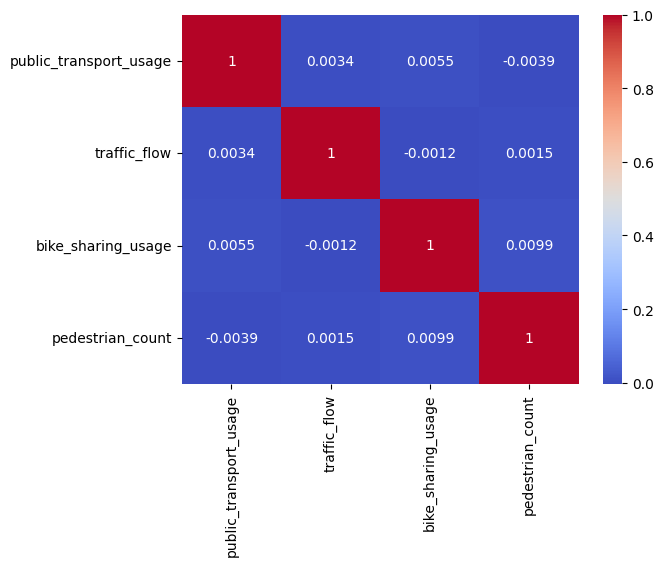

In [18]:
import seaborn as sns
correlation_matrix = df1[['public_transport_usage', 'traffic_flow', 'bike_sharing_usage', 'pedestrian_count']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

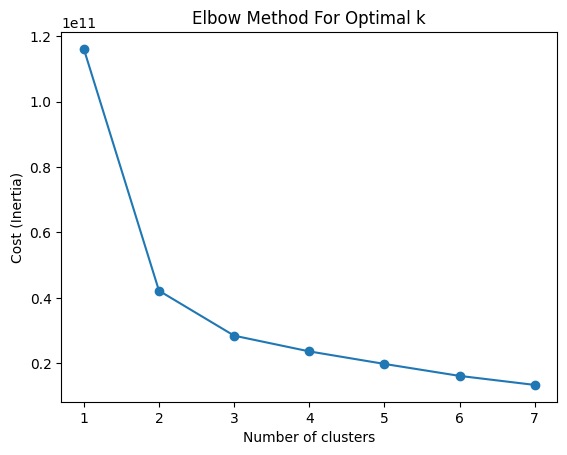

In [22]:
# Impute missing values using the mean strategy
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans # Import KMeans

# Assuming 'df1' is the DataFrame you want to cluster, replace this with the correct DataFrame if needed
cluster_data = df1[['public_transport_usage', 'traffic_flow', 'bike_sharing_usage', 'pedestrian_count']]

imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
cluster_data_imputed = imputer.fit_transform(cluster_data)

# Finding optimal number of clusters using the Elbow Method
cost = []
for num_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(cluster_data_imputed)  # Use the imputed data
    cost.append(kmeans.inertia_)

plt.plot(range(1, 8), cost, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

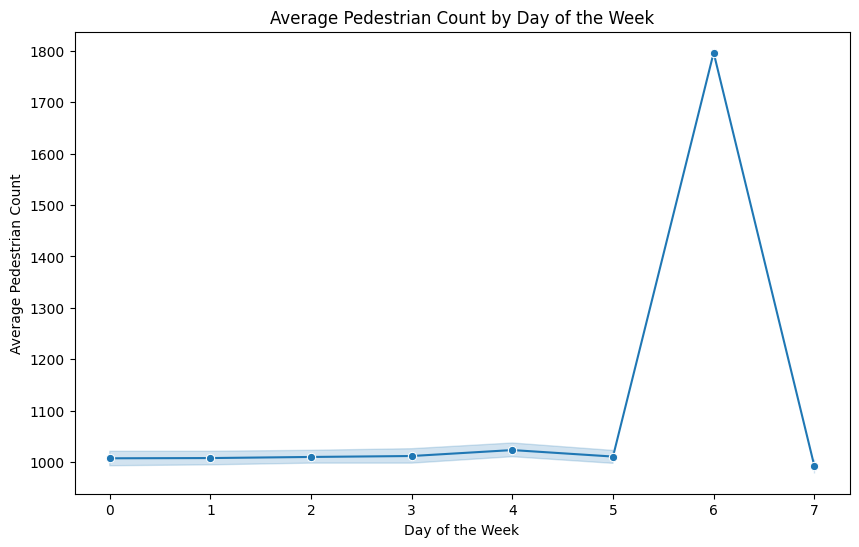

In [23]:
# Line plot for pedestrian count by day of the week
plt.figure(figsize=(10, 6))



# If df1 is the correct DataFrame, use it in the lineplot
sns.lineplot(x='day_of_week', y='pedestrian_count', data=df1, marker='o')

plt.title('Average Pedestrian Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Count')
plt.show()


### **Behavioural Segmentation**

In [16]:
df4.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [17]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido


In [25]:
df4.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [26]:
print(pd.isnull(df4).sum())

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


In [27]:
df4.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df4.rename(columns={'Price':'EV_Price'},inplace=True)
df4.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


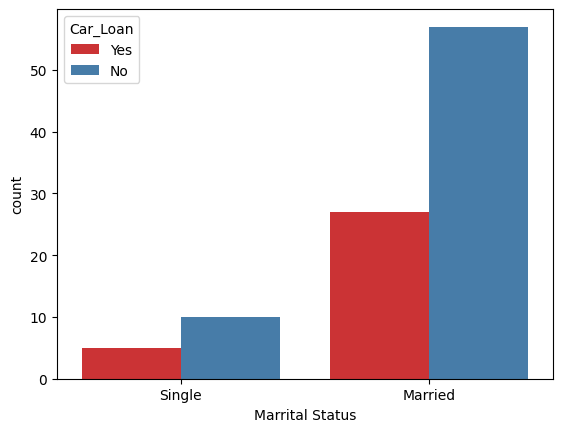

In [28]:
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = df4, palette = 'Set1')
plt.show()

In [29]:
(df4['Marrital Status'].value_counts()['Married'])/((df4['Marrital Status'].value_counts()['Married'])+(df4['Marrital Status'].value_counts()['Single']))*100


84.84848484848484

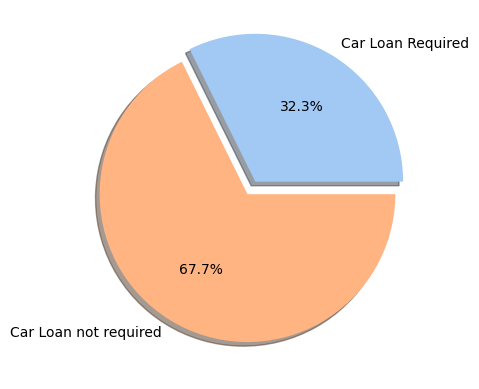

In [30]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [df4.query('Car_Loan == "Yes"').Car_Loan.count(),df4.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')

# displaying chart
plt.show()

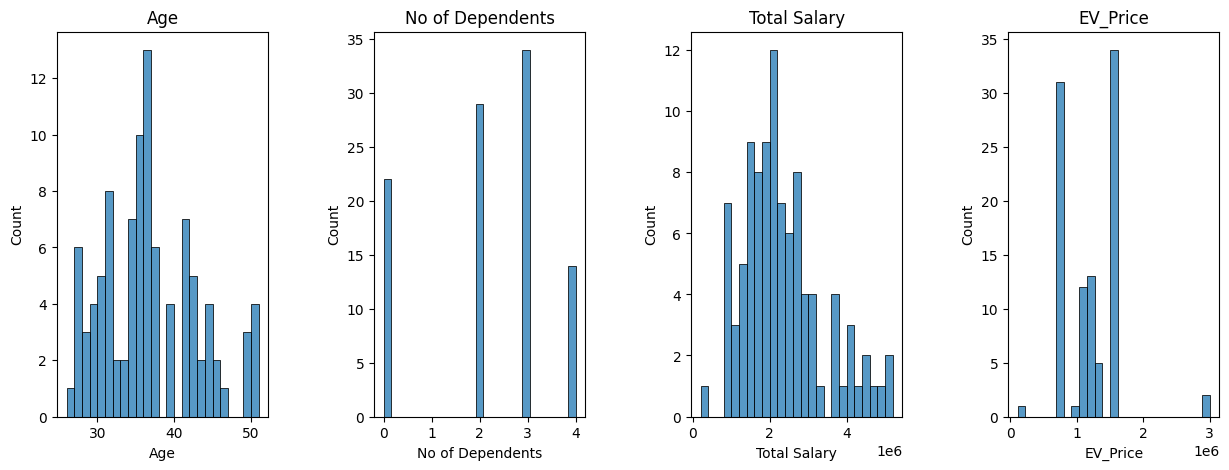

In [31]:
# Plotting the fequency of each entry for consumer features - Age, No. 0f Dependents, Total Salary, EV_Price
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df4[x], bins= 25)
  plt.title(f'{x}')
plt.show()


In [32]:
cluster_features = list(df4.columns)
cluster_data = df4[cluster_features].values

In [33]:
cluster_data[:, 0]


array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [34]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

In [37]:
!pip install kmodes

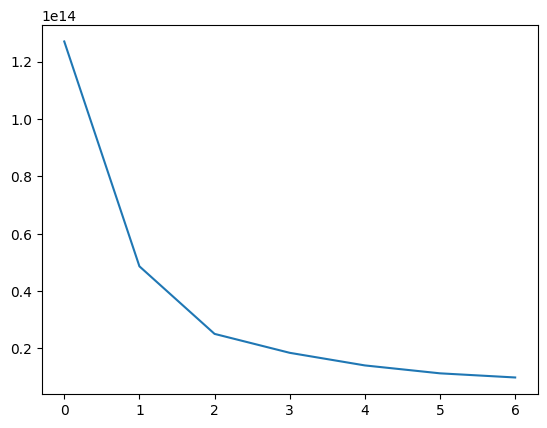

In [38]:
from kmodes.kprototypes import KPrototypes

# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [39]:
cost

[126979657487180.34,
 48631729380526.18,
 25087753148183.234,
 18491809410726.285,
 14099253855131.873,
 11342834153820.58,
 9899011952147.764]

In [40]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 20, ncost: 52302715084203.81
Run: 1, iteration: 2/20, moves: 8, ncost: 50057040964014.66
Run: 1, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 4/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 4, ncost: 49650723166357.79
Run: 2, iteration: 2/20, moves: 4, ncost: 48777842651066.98
Run: 2, iteration: 3/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 4, ncost: 48777842651066.98
Run: 3, iteration: 2/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 1, ncost: 48777842651066.98
Run

In [41]:
# Appending the cluster data

df4['Cluster'] = clusters


In [42]:
# Average cost of the EV
df4.EV_Price.mean()

1194040.4040404041

In [43]:
# Average cost of a car in segment 1
df4.EV_Price[df4.Cluster==0].mean()

1021267.6056338028

In [44]:
df4['EV_Price'][df4.Cluster==1].max()

3000000

In [45]:
# Average cost of a car in segment 1
df4.EV_Price[df4.Cluster==1].mean()

1632142.857142857

In [46]:
df4['Cluster'].value_counts(normalize=True) * 100

Cluster
0    71.717172
1    28.282828
Name: proportion, dtype: float64

In [47]:
# Segregrating each cluster

Cluster_0 = df4[df4.Cluster==0]
Cluster_1 = df4[df4.Cluster==1]

In [48]:
df4['Cluster'].value_counts()


Cluster
0    71
1    28
Name: count, dtype: int64

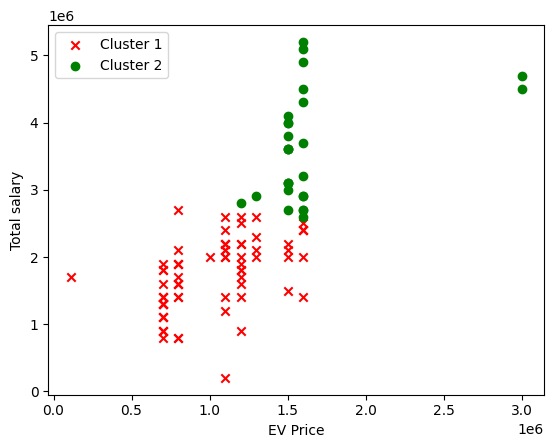

In [49]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

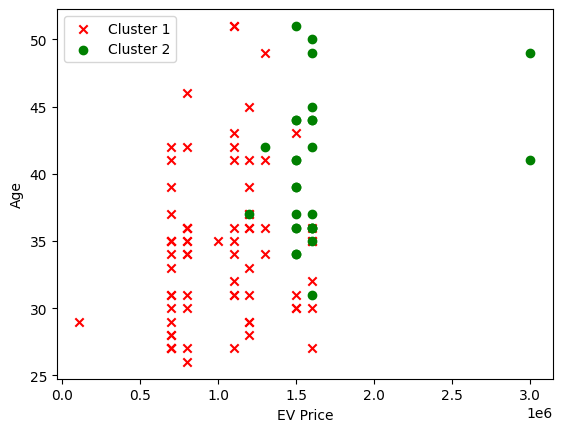

In [50]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

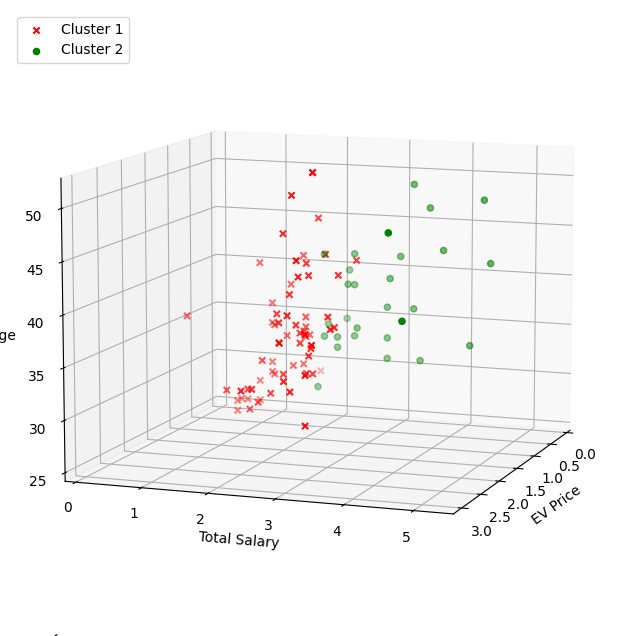

In [51]:
from mpl_toolkits.mplot3d import Axes3D


# plotting influence of age

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()



### **Vehicle Specification Segmentation**

In [52]:
df3.head()


,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [53]:

import altair as alt
alt.Chart(df3).mark_circle().encode(
    x='Brand',
    y='PriceEuro',
    color='Model',
    tooltip=['Brand', 'PriceEuro', 'Model']
).interactive()


alt.Chart(...)

In [54]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


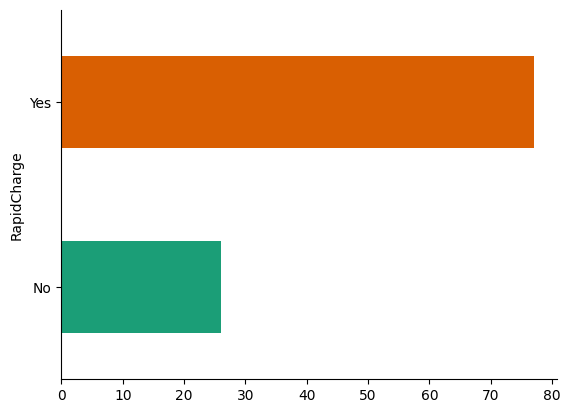

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('RapidCharge').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

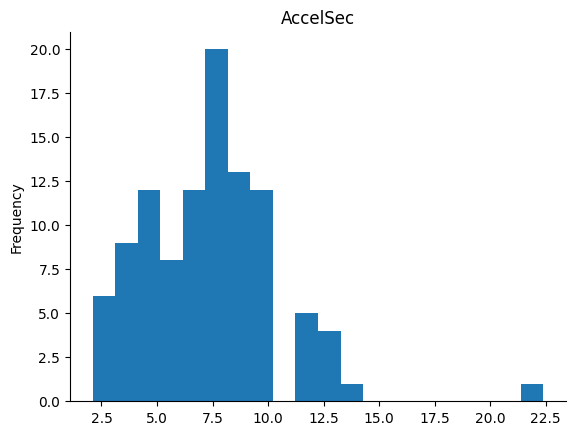

In [61]:
from matplotlib import pyplot as plt
df3['AccelSec'].plot(kind='hist', bins=20, title='AccelSec')
plt.gca().spines[['top', 'right',]].set_visible(False)

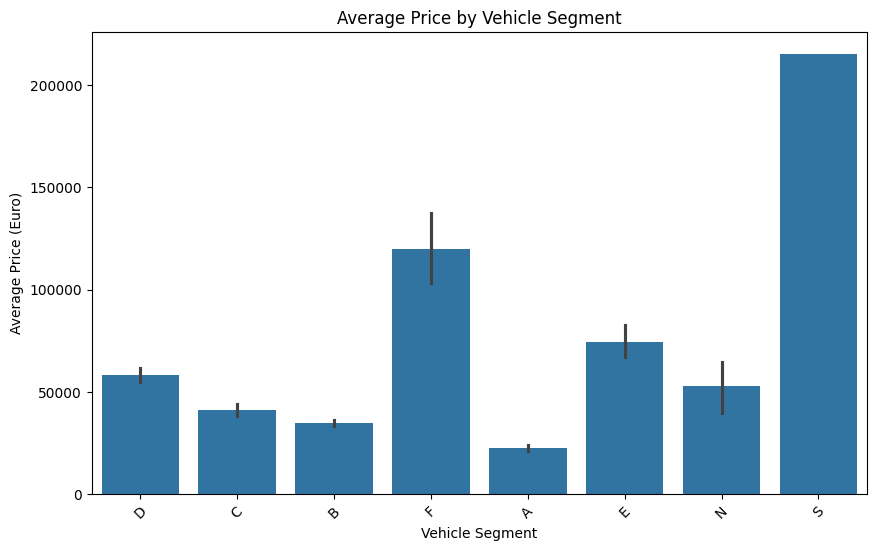

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='PriceEuro', data=df3)
plt.title('Average Price by Vehicle Segment')
plt.xticks(rotation=45)
plt.xlabel('Vehicle Segment')
plt.ylabel('Average Price (Euro)')
plt.show()

In [63]:
a=np.arange(1,104)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

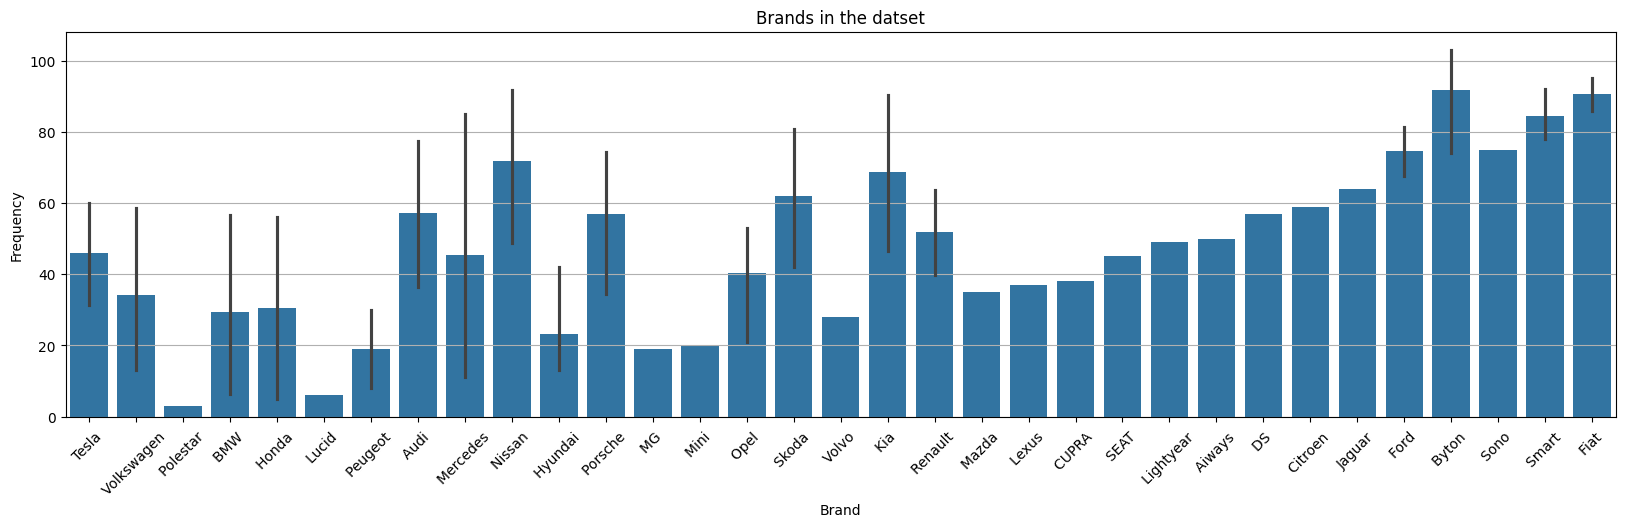

In [64]:
import seaborn as sns

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y=a,data=df3)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Plug Type')

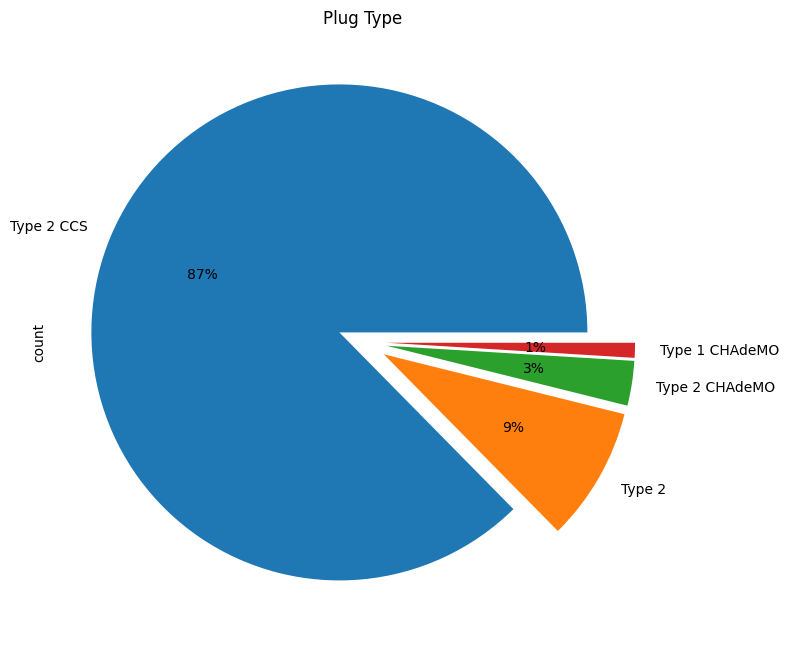

In [65]:
#Type of Plug used for charging
df3['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [67]:
features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Seats']

# Prepare data
X = df3[features]
y = df3['PriceEuro']




In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [69]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance (using Mean Squared Error in this example)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 293564270.41155183


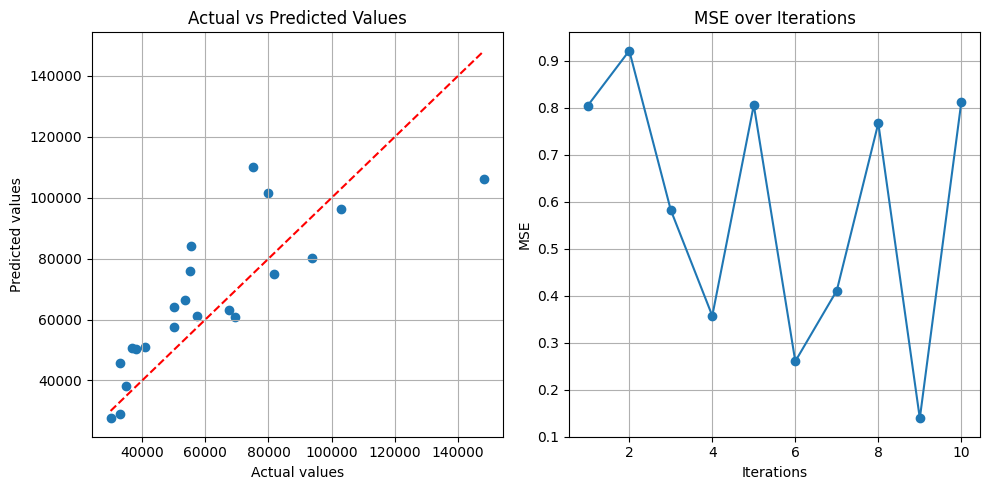

In [70]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.grid(True)

# Assuming you have MSE values over iterations from model training
# Sample MSE values over iterations (replace with your actual values if available)
iterations = np.arange(1, 11)
mse_values = np.random.rand(10)  # Replace with actual MSE values from your training process

plt.subplot(1, 2, 2)
plt.plot(iterations, mse_values, marker='o')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE over Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Geographic Segmentation**

In [71]:
df2.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [82]:

import altair as alt
alt.Chart(df2).mark_bar().encode(
    x='state',
    y='name'
)


alt.Chart(...)

In [73]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoder
label_encoder = LabelEncoder()
df2['city'] = label_encoder.fit_transform(df2['city'])

df2['name'] = label_encoder.fit_transform(df2['name'])




In [74]:
df2.head()

,name,state,city,address,lattitude,longitude,type
0,804,Haryana,109,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,417,Haryana,109,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,487,Rajasthan,39,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,393,Uttar Pradesh,155,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,392,Uttar Pradesh,155,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [75]:
# EDA - Count charging stations by state
stations_by_state = df2['state'].value_counts().reset_index()
stations_by_state.columns = ['State', 'Number of Charging Stations']
stations_by_state = stations_by_state.sort_values(by='Number of Charging Stations', ascending=False)


In [76]:
df2.shape

(1547, 7)

In [77]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract the features for clustering
X = df2[['city', 'name']]



In [78]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

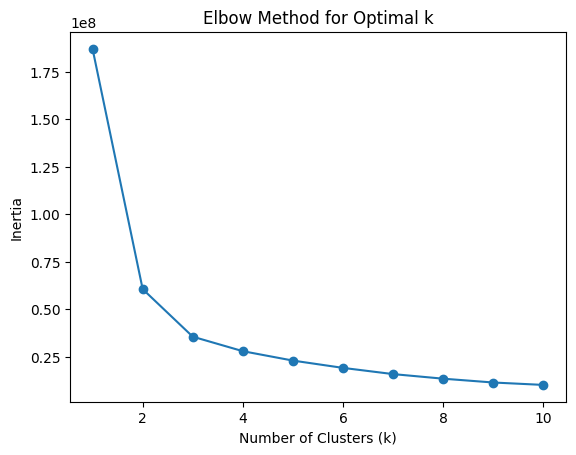

In [79]:
# Plot the Elbow method results
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



In [80]:
# Choose the optimal number of clusters (e.g., k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df2['cluster'] = kmeans.fit_predict(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


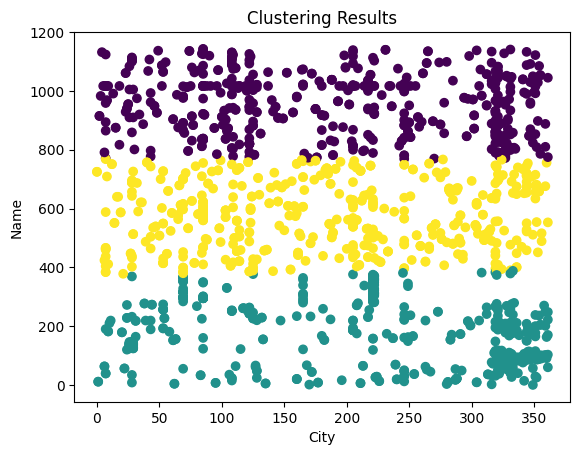

In [81]:
# Visualize the clusters
plt.scatter(df2['city'], df2['name'], c=df2['cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('City')
plt.ylabel('Name')
plt.show()
